## Installations

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 36.1 MB/s 
     |████████████████████████████████| 451 kB 62.5 MB/s 
     |████████████████████████████████| 1.3 MB 55.2 MB/s 
     |████████████████████████████████| 5.5 MB 54.8 MB/s 
     |████████████████████████████████| 1.6 MB 65.4 MB/s 
     |████████████████████████████████| 115 kB 60.0 MB/s 
     |████████████████████████████████| 182 kB 74.9 MB/s 
     |████████████████████████████████| 212 kB 75.4 MB/s 
     |████████████████████████████████| 127 kB 72.6 MB/s 
     |████████████████████████████████| 7.6 MB 48.8 MB/s 
Mounted at /content/gdrive


## Kaggle dataset setup

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d asdasdasasdas/garbage-classification

In [ ]:
! unzip "/content/garbage-classification.zip" -d garbage

In [ ]:
data_dir  = '/content/garbage/garbage classification/Garbage classification'

In [ ]:
classes = os.listdir(data_dir)
print(classes)

## Setting up Fastai dataloader

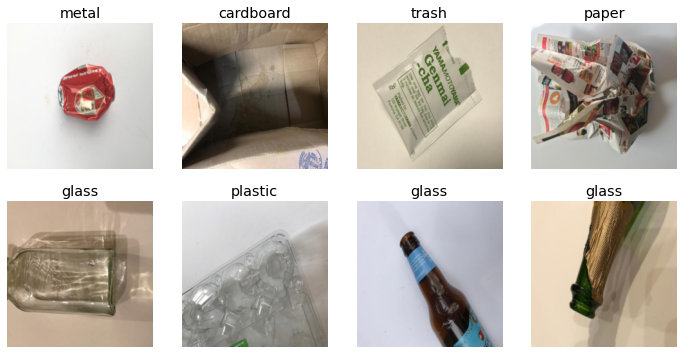

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(227, method='squish')]
).dataloaders(data_dir, bs=32)

dls.show_batch(max_n=8)

### Finetuning on a Pre-trained Resnet-18 

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.537645,0.607777,0.215842,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.621123,0.388000,0.120792,00:21
1,0.399696,0.382062,0.120792,00:20
2,0.221163,0.299711,0.091089,00:16
3,0.124990,0.310984,0.099010,00:21
4,0.065710,0.307037,0.089109,00:17


In [ ]:
learn.predict('/content/papers.jpg')

('paper',
 TensorBase(3),
 TensorBase([2.2879e-03, 4.4699e-06, 5.3830e-03, 9.9121e-01, 1.6349e-04, 9.5488e-04]))

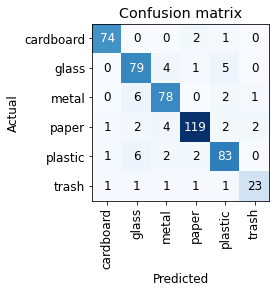

In [ ]:
plotConfMatrix = ClassificationInterpretation.from_learner(learn)
plotConfMatrix.plot_confusion_matrix()

In [ ]:
learn.export()